## Task description
Project Title: Sentiment Analysis of Product Reviews
Objective:
To build a machine learning model that can classify product reviews as positive or negative using Naive Bayes and Logistic Regression algorithms, with TF-IDF for feature extraction.

Steps:
1.  
Data Collection:
•  Collect a dataset of product reviews. This can be sourced from online platforms like Amazon, Yelp, or any other e-commerce site.

•  Ensure the dataset includes text reviews and corresponding sentiment labels (positive or negative).

1.  
Data Preprocessing:
•  Text Cleaning: Remove any irrelevant characters, punctuation, and stop words from the reviews.

•  Tokenization: Split the text into individual words or tokens.

•  Lemmatization/Stemming: Reduce words to their base or root form.

1.  
Feature Extraction:
•  Use TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text data into numerical features.

•  TF-IDF helps in highlighting important words in the reviews by considering the frequency of words in a document relative to their frequency in the entire dataset.

1.  
Model Building:
•  Naive Bayes Classifier:

•  Train a Naive Bayes classifier on the TF-IDF features.

•  Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.

•  Logistic Regression:

•  Train a Logistic Regression model on the same TF-IDF features.

•  Evaluate its performance using the same metrics.

1.  
Model Comparison:
•  Compare the performance of both models to determine which one performs better for this specific task.

•  Analyze the confusion matrix for both models to understand their strengths and weaknesses.

1.  
Hyperparameter Tuning:
•  Perform hyperparameter tuning using techniques like Grid Search or Random Search to optimize the models' performance.
2.  
Model Deployment:
•  Once the best model is selected, deploy it as a web service or integrate it into an application where users can input new reviews and get sentiment predictions.
3.  
Documentation and Reporting:
•  Document the entire process, including data collection, preprocessing, model building, evaluation, and deployment.

•  Create a report or presentation summarizing the findings and results.

Tools and Libraries:
•  Programming Language: Python

•  Libraries:

•  Data Preprocessing: NLTK, SpaCy

•  Feature Extraction: Scikit-learn (TF-IDF Vectorizer)

•  Model Building: Scikit-learn (Naive Bayes, Logistic Regression)

•  Model Evaluation: Scikit-learn (metrics)

•  Hyperparameter Tuning: Scikit-learn (GridSearchCV, RandomizedSearchCV)

•  Deployment: Flask or Django for web service

Expected Outcome:
A robust sentiment analysis model that can accurately classify product reviews as positive or negative, providing valuable insights for businesses to understand customer opinions.

##  Get Current directory

In [1]:
!pwd

/content


## Mout Drive
To save models and dataset uploads

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the necessory librires

In [3]:
# Import necessary libraries
from google.colab import drive, files
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter
import warnings

## Make a new workspace

In [ ]:
# Create SentimentAnalysis directory if it doesn't exist
os.makedirs('/content/drive/MyDrive/SentimentAnalysis', exist_ok=True)

## Change to Working Directory

In [4]:
# Change to the SentimentAnalysis directory
os.chdir('/content/drive/MyDrive/SentimentAnalysis')

## Upload the Move zipped datasets

In [ ]:
from google.colab import files
files.upload()

## Extract data from compressed file

In [ ]:
!unzip archive.zip -d ./

Archive:  archive.zip
  inflating: ./IMDB Dataset.csv      


## Get NLTK data

In [30]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data into pandas dataframe

In [7]:
# Load and preview the dataset
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())
print(df.shape)
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


## Check if the datasets are balnced or not
- As we can see the datasets are balnced where eeach class(Lable) has equial numbers in (Postive and Negtive)

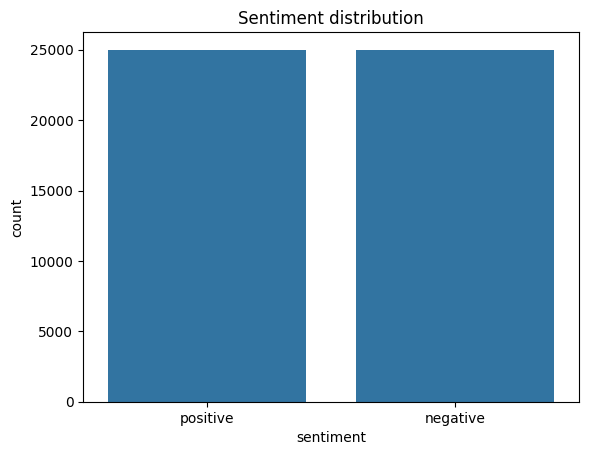

In [8]:
# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")
plt.show()

In [9]:
# Display sample reviews and sentiments
for i in range(5):
    print("Review: ", df['review'].iloc[i])
    print("Sentiment: ", df['sentiment'].iloc[i], "\n")

Review:  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [10]:
# Define a function to count the number of words in a text
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [11]:
# Add a word count column to the dataframe
df['word count'] = df['review'].apply(no_of_words)
print(df.head())

                                              review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230


## Plot histograms of word counts for positive and negative reviews

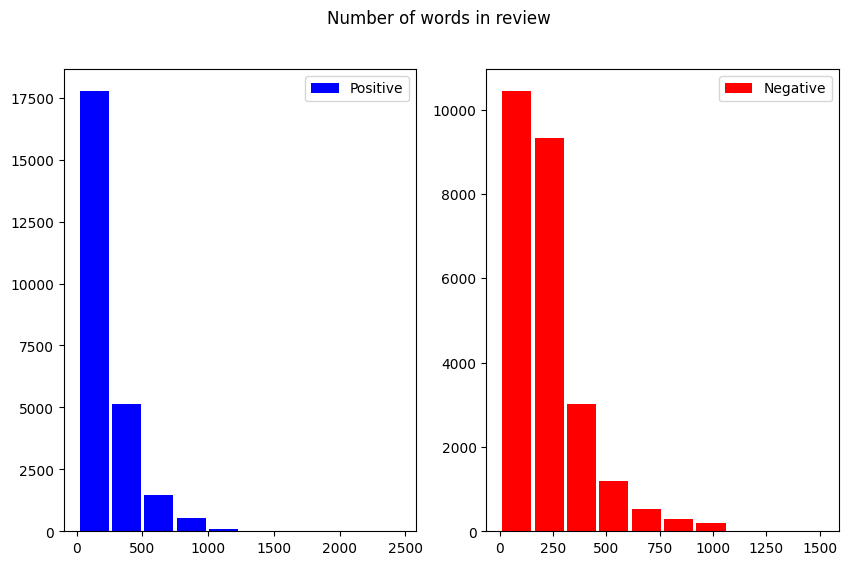

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

## Plot histograms of review lengths for positive and negative reviews

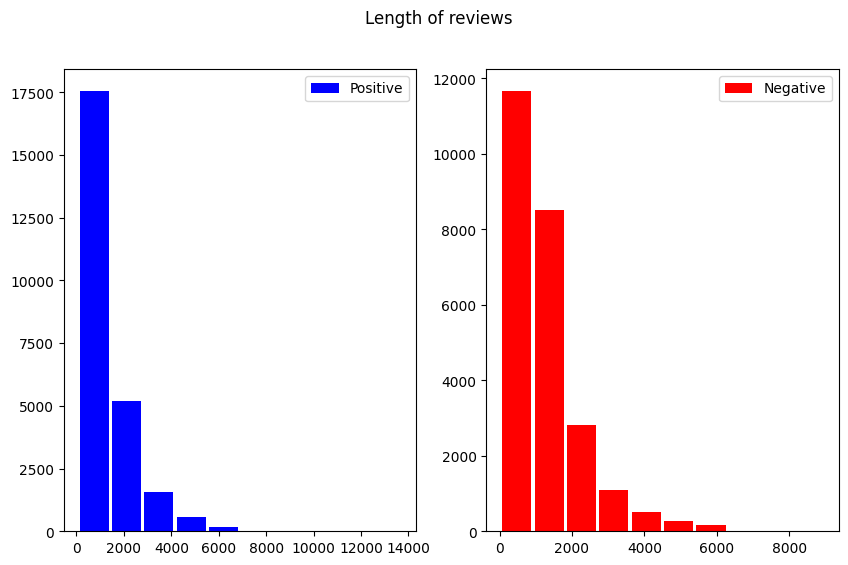

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Length of reviews")
plt.show()

## Catogrical to Numerical values

In [31]:
# Convert sentiment labels to numerical values
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)
print(df.head())

                                              review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230


## Data Cleaning

In [32]:
# Define a function to preprocess text data
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [33]:
# Apply preprocessing to the review column
df.review = df['review'].apply(data_processing)

## Remove reapeted reviews

In [34]:
# Drop duplicate reviews
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)
df = df.drop_duplicates('review')

Number of duplicate entries:  421


In [35]:
# Define a function for stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data.split()]
    return " ".join(text)

In [36]:
# Apply stemming to the review column
df.review = df['review'].apply(stemming)
df['word count'] = df['review'].apply(no_of_words)
print(df.head())

                                              review  sentiment  word count
0  one review mention watch 1 oz episod youll hoo...          1         168
1  wonder littl product film techniqu unassum old...          1          84
2  thought wonder way spend time hot summer weeke...          1          86
3  basic there famili littl boy jake think there ...          2          67
4  petter mattei love time money visual stun film...          1         125


## See the Most frequent words in positive reviews using World Cloud

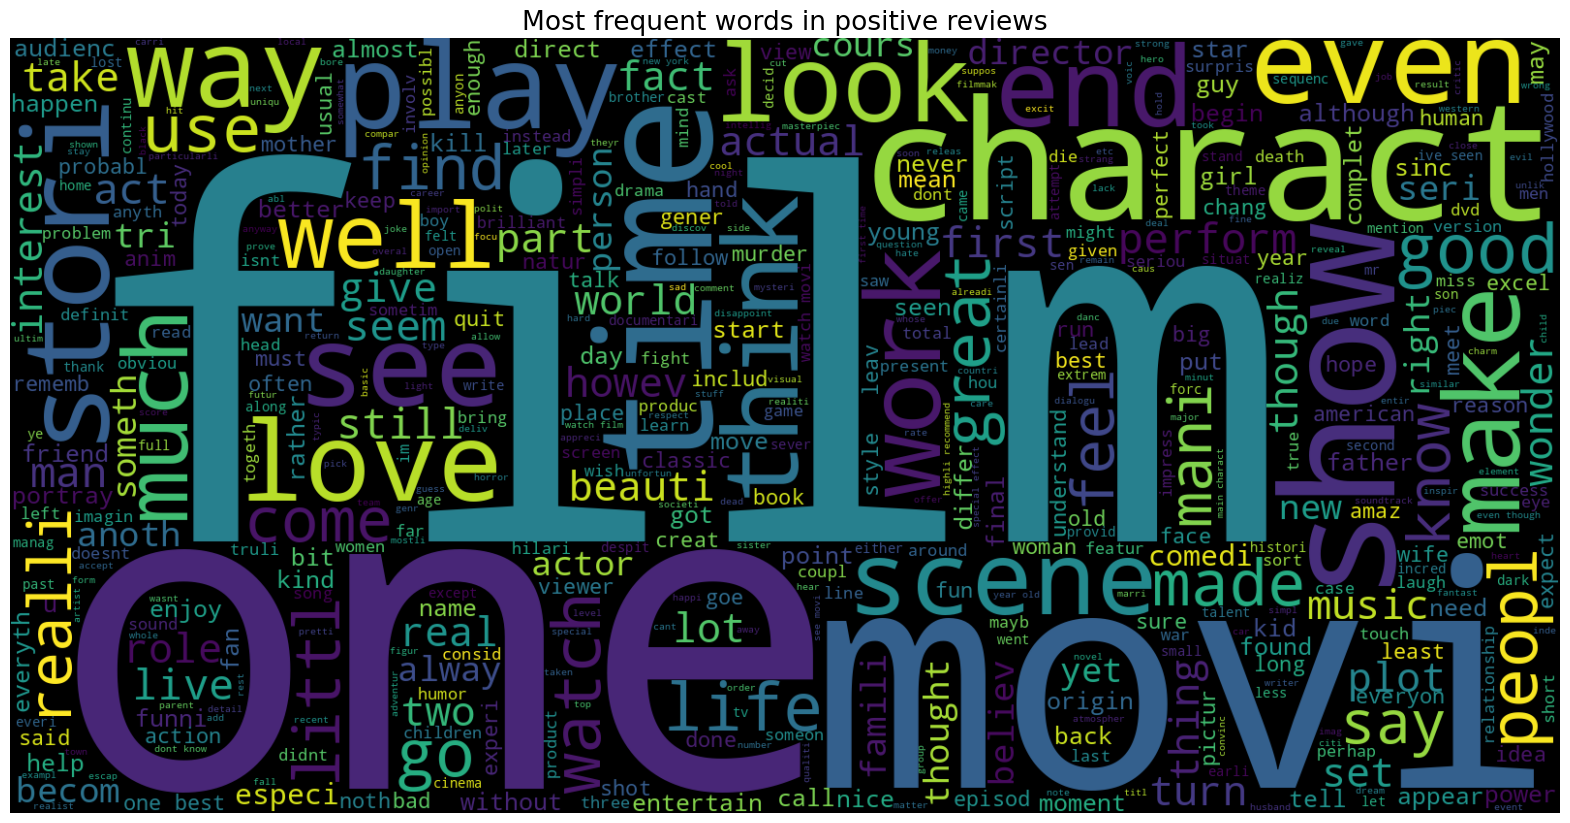

In [37]:
# Generate and display word cloud for positive reviews
pos_reviews = df[df.sentiment == 1]
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [ ]:
# Count most common words in positive reviews
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] += 1
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
print(pos_words.head())

## Virtualization for Common Postive Words

In [39]:
# Plot common words in positive reviews
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word').show()

## See the Most frequent words in Negative reviews using Word Cloud

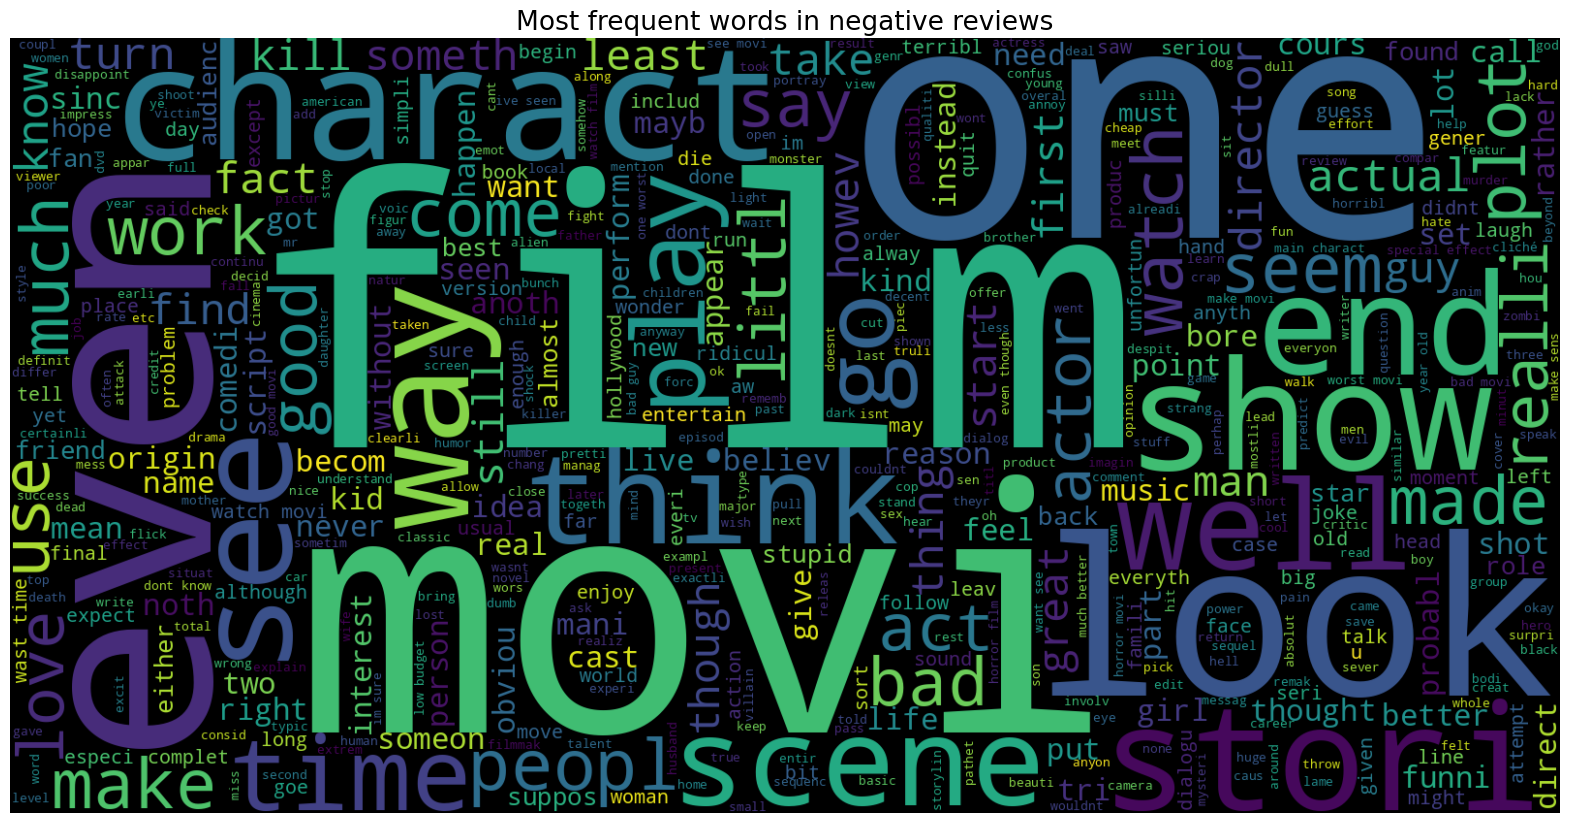

In [40]:
# Generate and display word cloud for negative reviews
neg_reviews = df[df.sentiment == 2]
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

In [ ]:
# Count most common words in negative reviews
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
print(neg_words.head())

   word  count
0  movi  55289
1  film  42590
2   one  25414
3  like  23647
4  make  15262


## Virtualization for Common Negative Words

In [ ]:
# Plot common words in negative reviews
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word').show()

## Siplit the Dataset into two sets

In [ ]:
# Split data into training and test sets
X = df['review']
Y = df['sentiment']
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Size of x_train: ", x_train.shape)
print("Size of y_train: ", y_train.shape)
print("Size of x_test: ", x_test.shape)
print("Size of y_test: ", y_test.shape)

Size of x_train:  (39662, 181877)
Size of y_train:  (39662,)
Size of x_test:  (9916, 181877)
Size of y_test:  (9916,)


## Train and Evalute the Logistic Regression model

In [ ]:
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Logistic Regression Test accuracy: {:.2f}%".format(logreg_acc * 100))
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Test accuracy: 89.15%
[[4586  485]
 [ 591 4254]]
              precision    recall  f1-score   support

           1       0.89      0.90      0.90      5071
           2       0.90      0.88      0.89      4845

    accuracy                           0.89      9916
   macro avg       0.89      0.89      0.89      9916
weighted avg       0.89      0.89      0.89      9916



## Logistc Regression Hypaerparmeters Tuning

In [ ]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

In [ ]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = RandomizedSearchCV(logreg, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

## Train and evaluate Multinomial Naive Bayes model

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Multinomial Naive Bayes Test accuracy: {:.2f}%".format(mnb_acc * 100))
print(confusion_matrix(y_test, mnb_pred))
print(classification_report(y_test, mnb_pred))

Multinomial Naive Bayes Test accuracy: 85.69%
[[4290  781]
 [ 638 4207]]
              precision    recall  f1-score   support

           1       0.87      0.85      0.86      5071
           2       0.84      0.87      0.86      4845

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916



## Perform Grid Search for hyperparameter tuning
- GridSearchCV

In [ ]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(mnb, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .........................alpha=0.1;, score=0.855 total time=   0.1s
[CV 2/5] END .........................alpha=0.1;, score=0.855 total time=   0.2s
[CV 3/5] END .........................alpha=0.1;, score=0.854 total time=   0.2s
[CV 4/5] END .........................alpha=0.1;, score=0.864 total time=   0.2s
[CV 5/5] END .........................alpha=0.1;, score=0.847 total time=   0.1s
[CV 1/5] END ...........................alpha=1;, score=0.860 total time=   0.1s
[CV 2/5] END ...........................alpha=1;, score=0.861 total time=   0.2s
[CV 3/5] END ...........................alpha=1;, score=0.855 total time=   0.2s
[CV 4/5] END ...........................alpha=1;, score=0.863 total time=   0.2s
[CV 5/5] END ...........................alpha=1;, score=0.853 total time=   0.2s
[CV 1/5] END ..........................alpha=10;, score=0.851 total time=   0.2s
[CV 2/5] END ..........................alpha=10;,

## Perform RandomizedSearchCV for hyperparameter tuning
- RandomizedSearchCV

In [ ]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = RandomizedSearchCV(mnb, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .........................alpha=0.1;, score=0.855 total time=   0.1s
[CV 2/5] END .........................alpha=0.1;, score=0.855 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.854 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.864 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.847 total time=   0.0s
[CV 1/5] END ...........................alpha=1;, score=0.860 total time=   0.1s
[CV 2/5] END ...........................alpha=1;, score=0.861 total time=   0.1s
[CV 3/5] END ...........................alpha=1;, score=0.855 total time=   0.1s
[CV 4/5] END ...........................alpha=1;, score=0.863 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.853 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.851 total time=   0.0s
[CV 2/5] END ..........................alpha=10;,

## Save trained Models
- now where we are ?

In [ ]:
!pwd

/content/drive/MyDrive/SentimentAnalysis


## Make a new directory

In [ ]:
!mkdir Models

In [ ]:
!ls

 archive.zip  'IMDB Dataset.csv'   Models  'Sentiment analysis on IMDB dataset _ ML Live.ipynb'


In [ ]:
%cd Models
!pwd

## Save Trained Models

In [ ]:
import pickle

working_dir= 'Models/'
# Save the Logistic Regression model
with open(f'{working_dir}logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

# Save the Multinomial Naive Bayes model
with open(f'{working_dir}multinomial_nb_model.pkl', 'wb') as file:
    pickle.dump(mnb, file)

# Save the TfidfVectorizer
with open(f'{working_dir}tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vect, file)


## Test on unseen dataset with HTML

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
# Define stop words
stop_words = set(stopwords.words('english'))

# Define the text processing function
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

# Define the stemming function
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data.split()]
    return " ".join(text)

# Working Space
working_dir = '/content/drive/MyDrive/SentimentAnalysis/Models/'
# Load the vectorizer and model
# Assuming you've already trained and saved the model and vectorizer
with open(f'{working_dir}tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)
# Load the trained models and vectorizer
with open(f'{working_dir}logistic_regression_model.pkl', 'rb') as file:
    logreg = pickle.load(file)

mnb_model = pickle.load(open(f'{working_dir}multinomial_nb_model.pkl', 'rb'))


# Function to predict sentiment
def predict_sentiment(review):
    processed_review = stemming(data_processing(review))
    transformed_review = tfidf_vectorizer.transform([processed_review])
    prediction = logreg.predict(transformed_review)
    # Here you can change and adapte to Naive Base Model
    # prediction = mnb_model.predict(transformed_review)
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    return sentiment

# Register the function as a Colab callback
from google.colab import output

def sentiment_analysis(review):
    sentiment = predict_sentiment(review)
    output.eval_js(f"displayResult('{sentiment}')")

output.register_callback('notebook.sentiment_analysis', sentiment_analysis)


In [ ]:
from IPython.display import display, HTML

html_code = """
<!DOCTYPE html>
<html>
<body>

<h2>Sentiment Analysis Input</h2>
<form id="sentiment-form">
  <label for="review">Enter a review:</label><br><br>
  <textarea id="review" name="review" rows="4" cols="50"></textarea><br><br>
  <input type="button" value="Submit" onclick="getSentiment()">
</form>

<p id="result"></p>

<script>
function getSentiment() {
    var review = document.getElementById("review").value;
    google.colab.kernel.invokeFunction('notebook.sentiment_analysis', [review], {});
}

function displayResult(result) {
    document.getElementById("result").innerText = result;
}
</script>

</body>
</html>
"""

display(HTML(html_code))

## Flask Web App
- Note: sometimes the browser refuse the connection, this problem comming from Windwos system firewall
- So we introudece Flask Local Web App.

In [ ]:
from flask import Flask, request, jsonify, render_template
import pickle
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# Initialize Flask app
app = Flask(__name__)

# Working Space
working_dir = '/content/drive/MyDrive/SentimentAnalysis/Models/'

# Load models and vectorizer
logreg_model = pickle.load(open(f'{working_dir}logistic_regression_model.pkl', 'rb'))
mnb_model = pickle.load(open(f'{working_dir}multinomial_nb_model.pkl', 'rb'))
tfidf_vectorizer = pickle.load(open(f'{working_dir}tfidf_vectorizer.pkl', 'rb'))

# Preprocessing functions
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

def stemming(data):
    text = [stemmer.stem(word) for word in data.split()]
    return " ".join(text)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        review = request.form['review']
        processed_review = stemming(data_processing(review))
        transformed_review = tfidf_vectorizer.transform([processed_review])

        logreg_prediction = logreg_model.predict(transformed_review)
        mnb_prediction = mnb_model.predict(transformed_review)

        return jsonify({
            'logistic_regression_prediction': int(logreg_prediction[0]),
            'naive_bayes_prediction': int(mnb_prediction[0])
        })

if __name__ == "__main__":
    app.run(debug=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import requests

url = 'http://127.0.0.1:5000/predict'
data = {'review': 'This movie was fantastic!'}
response = requests.post(url, json=data)
print(response.json())